This notebook is a simulation of 5000 ms of the Soleus muscle (800 motoneurons) with injected current. 

In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool

In [2]:
conf = Configuration('confMotorUnitPoolEMG.rmto')
conf.simDuration_ms = 500 # Here I change simulation duration without changing the Configuration file.

In [3]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

In [4]:
pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')

Motor Unit Pool SOL built


In [5]:
tic = time.clock()
for i in xrange(0, len(t)-1):
    for j in xrange(len(pools[0].unit)):
        pools[0].unit[j].iInjected[1] = 10
    pools[0].atualizeMotorUnitPool(t[i])
toc = time.clock()
print str(toc - tic) + ' seconds'

506.574798 seconds


In [6]:
pools[0].listSpikes()

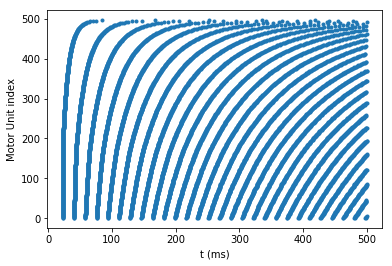

In [7]:
plt.figure()
plt.plot(pools[0].poolTerminalSpikes[:, 0],
         pools[0].poolTerminalSpikes[:, 1] + 1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Motor Unit index')

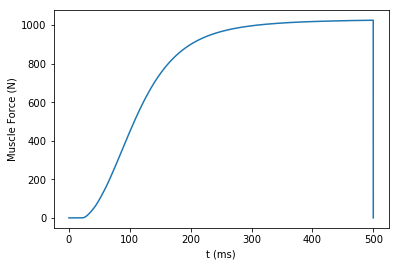

In [8]:
plt.figure()
plt.plot(t, pools[0].Muscle.force, '-')
plt.xlabel('t (ms)')
plt.ylabel('Muscle Force (N)')

In [9]:
pools[0].getMotorUnitPoolEMG()

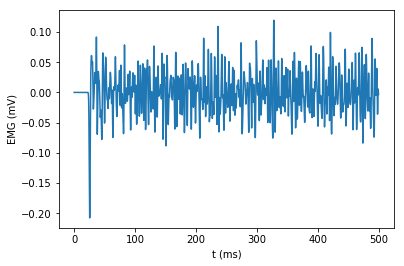

In [10]:
plt.figure()
plt.plot(t, pools[0].emg, '-')
plt.xlabel('t (ms)')
plt.ylabel('EMG (mV)')